In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/compresive_strength_concrete.csv')

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.shape

(1030, 9)

In [5]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [11]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [12]:
# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Scale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [64]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [66]:
model.fit(X_train, y_train, batch_size=128, epochs=500, verbose=1, callbacks=[early_stop], validation_data=(X_test, y_test))

Train on 824 samples, validate on 206 samples
Epoch 1/500
824/824 [==============================] - 1s 685us/sample - loss: 1568.3011 - mae: 35.8277 - val_loss: 1511.8783 - val_mae: 35.4127
Epoch 2/500
824/824 [==============================] - 0s 62us/sample - loss: 1543.1834 - mae: 35.4824 - val_loss: 1487.7361 - val_mae: 35.0717
Epoch 3/500
824/824 [==============================] - 0s 53us/sample - loss: 1515.6592 - mae: 35.0886 - val_loss: 1454.4943 - val_mae: 34.5949
Epoch 4/500
824/824 [==============================] - 0s 56us/sample - loss: 1477.0060 - mae: 34.5316 - val_loss: 1405.5785 - val_mae: 33.8879
Epoch 5/500
824/824 [==============================] - 0s 59us/sample - loss: 1421.2777 - mae: 33.7169 - val_loss: 1337.0514 - val_mae: 32.8723
Epoch 6/500
824/824 [==============================] - 0s 60us/sample - loss: 1343.8591 - mae: 32.5616 - val_loss: 1243.7302 - val_mae: 31.4384
Epoch 7/500
824/824 [==============================] - 0s 59us/sample - loss: 1242.0599 -

824/824 [==============================] - 0s 61us/sample - loss: 141.6285 - mae: 9.4650 - val_loss: 112.4753 - val_mae: 8.6160
Epoch 59/500
824/824 [==============================] - 0s 59us/sample - loss: 133.9590 - mae: 9.1484 - val_loss: 111.3393 - val_mae: 8.5666
Epoch 60/500
824/824 [==============================] - 0s 61us/sample - loss: 141.9363 - mae: 9.4937 - val_loss: 110.2786 - val_mae: 8.5204
Epoch 61/500
824/824 [==============================] - 0s 54us/sample - loss: 144.0466 - mae: 9.4868 - val_loss: 109.6404 - val_mae: 8.4975
Epoch 62/500
824/824 [==============================] - 0s 59us/sample - loss: 137.3284 - mae: 9.2575 - val_loss: 108.7166 - val_mae: 8.4590
Epoch 63/500
824/824 [==============================] - 0s 56us/sample - loss: 131.3530 - mae: 9.0826 - val_loss: 108.4273 - val_mae: 8.4426
Epoch 64/500
824/824 [==============================] - 0s 56us/sample - loss: 134.4947 - mae: 9.2690 - val_loss: 108.2055 - val_mae: 8.4282
Epoch 65/500
824/824 [====

824/824 [==============================] - 0s 44us/sample - loss: 123.8339 - mae: 8.7369 - val_loss: 85.1897 - val_mae: 7.3800
Epoch 117/500
824/824 [==============================] - 0s 48us/sample - loss: 119.9784 - mae: 8.5123 - val_loss: 85.0835 - val_mae: 7.3711
Epoch 118/500
824/824 [==============================] - 0s 45us/sample - loss: 107.4702 - mae: 8.1756 - val_loss: 84.3748 - val_mae: 7.3215
Epoch 119/500
824/824 [==============================] - 0s 44us/sample - loss: 114.9516 - mae: 8.3827 - val_loss: 84.2128 - val_mae: 7.3142
Epoch 120/500
824/824 [==============================] - 0s 51us/sample - loss: 119.6317 - mae: 8.5236 - val_loss: 83.5278 - val_mae: 7.2740
Epoch 121/500
824/824 [==============================] - 0s 53us/sample - loss: 115.5921 - mae: 8.4597 - val_loss: 82.9209 - val_mae: 7.2482
Epoch 122/500
824/824 [==============================] - 0s 44us/sample - loss: 109.8130 - mae: 8.2407 - val_loss: 82.9554 - val_mae: 7.2782
Epoch 123/500
824/824 [====

824/824 [==============================] - 0s 52us/sample - loss: 94.6630 - mae: 7.5050 - val_loss: 64.9081 - val_mae: 6.4171
Epoch 175/500
824/824 [==============================] - 0s 45us/sample - loss: 97.5175 - mae: 7.6647 - val_loss: 65.5853 - val_mae: 6.4124
Epoch 176/500
824/824 [==============================] - 0s 46us/sample - loss: 94.8387 - mae: 7.5844 - val_loss: 64.2710 - val_mae: 6.3649
Epoch 177/500
824/824 [==============================] - 0s 52us/sample - loss: 105.1628 - mae: 7.7978 - val_loss: 63.8068 - val_mae: 6.3492
Epoch 178/500
824/824 [==============================] - 0s 50us/sample - loss: 95.5674 - mae: 7.4374 - val_loss: 65.3879 - val_mae: 6.3960
Epoch 179/500
824/824 [==============================] - 0s 50us/sample - loss: 96.2149 - mae: 7.5232 - val_loss: 63.9465 - val_mae: 6.3516
Epoch 180/500
824/824 [==============================] - 0s 46us/sample - loss: 88.5680 - mae: 7.3505 - val_loss: 62.8950 - val_mae: 6.3306
Epoch 181/500
824/824 [==========

In [67]:
metrics = pd.DataFrame(model.history.history)

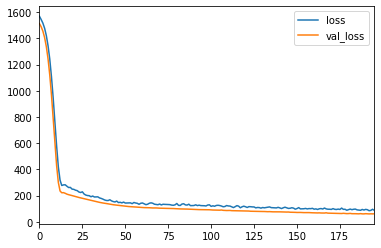

In [68]:
metrics[['loss', 'val_loss']].plot()

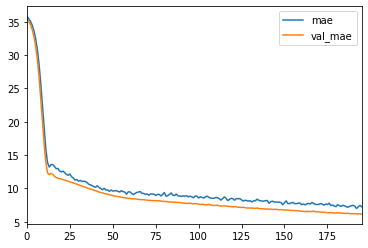

In [69]:
metrics[['mae', 'val_mae']].plot()

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [71]:
predictions = model.predict(X_test)

In [72]:
mserror = mean_squared_error(y_test, predictions)
mserror

61.584008606410826

In [73]:
np.sqrt(mserror)

7.847547935910352

In [74]:
mean_absolute_error(y_test, predictions)

6.1906152649296144

In [75]:
df.iloc[:,-1].describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [76]:
explained_variance_score(y_test, predictions)

0.7667426518047917

In [ ]:
model.